In [36]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [2]:
#GDP data found on https://data.imf.org/regular.aspx?key=63122827
#If direct link doesn't work, go to imf.org and search for GDP under National Accounts and Price Statistics OR
#search on International Financial Statistics (IFS) link from IMF.
#Quality of living index found on https://stats.oecd.org/index.aspx?DataSetCode=BLI

In [37]:
#Load the data
oecd_bli = pd.read_csv("BLI_20012023222553167.csv", thousands=',')

In [38]:
gdp_per_capita = pd.read_csv("gdp_per_capita_usd_world.csv",
thousands=',',
usecols=['Country Name', 'Country Code', '2021'],
skiprows=4,
skip_blank_lines=True,
)
gdp_per_capita.dropna(inplace=True) #remove rows with empty cells
gdp_per_capita.tail(10)

,Country Name,Country Code,2021
252,Uzbekistan,UZB,1983.064723
253,St. Vincent and the Grenadines,VCT,8666.387041
257,Vietnam,VNM,3756.489121
258,Vanuatu,VUT,2996.621062
259,World,WLD,12234.796802
260,Samoa,WSM,3857.318464
261,Kosovo,XKX,5269.783901
263,South Africa,ZAF,7055.044776
264,Zambia,ZMB,1137.343633
265,Zimbabwe,ZWE,1773.920411


In [23]:
#df["Median Sales Price"].map('{:,.0f}'.format)
#format '2021' column to show thousands separator
#gdp_per_capita['2021'] = gdp_per_capita['2021'].map('{:,.0f}'.format)


In [39]:
gdp_per_capita.head(10)

,Country Name,Country Code,2021
0,Aruba,ABW,29342.100858
1,Africa Eastern and Southern,AFE,1537.336021
2,Afghanistan,AFG,368.754614
3,Africa Western and Central,AFW,1757.030626
4,Angola,AGO,1953.533757
5,Albania,ALB,6492.872012
6,Andorra,AND,42137.327271
7,Arab World,ARB,6266.359916
8,United Arab Emirates,ARE,44315.554183
9,Argentina,ARG,10636.120196


In [172]:
#pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [194]:
#pd.reset_option('display.float_format') #reset float display format to defaults

In [40]:
oecd_bli.head(10)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.3,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.4,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.8,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.3,NaN,NaN
5,DNK,Denmark,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,4.5,NaN,NaN
6,FIN,Finland,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.2,NaN,NaN
7,FRA,France,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN
8,DEU,Germany,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,1.4,NaN,NaN
9,GRC,Greece,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,21.7,NaN,NaN


In [41]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

In [42]:
oecd_bli.head(10)

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,6.7,NaN,84.0,12.5,73.0,67.0,0.9,37433.0,528768.0,19.4,...,55206.0,93.0,NaN,85.0,2.7,499.0,14.36,92.0,92.0,20.0
Austria,12.2,0.8,86.0,5.3,72.0,86.0,0.5,37001.0,309637.0,20.8,...,53132.0,92.0,1.6,71.0,1.3,491.0,14.51,76.0,92.0,17.0
Belgium,12.8,0.7,80.0,4.3,65.0,56.0,1.1,34884.0,447607.0,20.0,...,54327.0,90.0,2.1,74.0,2.0,500.0,15.52,88.0,79.0,19.0
Brazil,11.7,6.7,57.0,5.6,57.0,45.0,19.0,NaN,NaN,NaN,...,NaN,83.0,NaN,NaN,2.2,400.0,NaN,80.0,70.0,16.0
Canada,7.1,0.2,92.0,3.3,70.0,78.0,1.2,34421.0,478240.0,22.9,...,55342.0,93.0,2.6,89.0,2.9,517.0,14.57,68.0,90.0,17.0
Chile,23.4,9.4,67.0,7.7,56.0,41.0,2.4,NaN,135787.0,18.4,...,26729.0,88.0,1.9,60.0,1.3,438.0,NaN,47.0,62.0,17.0
Colombia,22.6,12.3,59.0,23.7,58.0,50.0,23.1,NaN,NaN,NaN,...,NaN,80.0,1.0,80.0,1.4,406.0,NaN,53.0,82.0,14.0
Costa Rica,17.5,2.3,43.0,22.0,55.0,47.0,10.0,16517.0,NaN,17.0,...,NaN,82.0,1.2,73.0,1.8,415.0,NaN,66.0,87.0,NaN
Czech Republic,17.0,0.5,94.0,4.5,74.0,77.0,0.7,26664.0,NaN,23.4,...,29885.0,96.0,1.5,62.0,1.6,495.0,NaN,62.0,89.0,18.0


In [43]:
gdp_per_capita.rename(columns={"2021": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country Name", inplace=True)
gdp_per_capita.head(10)

,Country Code,GDP per capita
Country Name,,
Aruba,ABW,29342.100858
Africa Eastern and Southern,AFE,1537.336021
Afghanistan,AFG,368.754614
Africa Western and Central,AFW,1757.030626
Angola,AGO,1953.533757
Albania,ALB,6492.872012
Andorra,AND,42137.327271
Arab World,ARB,6266.359916
United Arab Emirates,ARE,44315.554183


In [44]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
full_country_stats.head(10)

,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Country Code,GDP per capita
Colombia,22.6,12.3,59.0,23.7,58.0,50.0,23.1,NaN,NaN,NaN,...,1.0,80.0,1.4,406.0,NaN,53.0,82.0,14.0,COL,6104.136709
South Africa,28.5,35.9,48.0,15.4,39.0,40.0,13.7,9338.0,NaN,18.1,...,NaN,NaN,NaN,NaN,NaN,66.0,72.0,NaN,ZAF,7055.044776
Brazil,11.7,6.7,57.0,5.6,57.0,45.0,19.0,NaN,NaN,NaN,...,NaN,NaN,2.2,400.0,NaN,80.0,70.0,16.0,BRA,7507.160971
Mexico,20.3,25.9,42.0,27.0,59.0,42.0,26.8,16269.0,NaN,17.8,...,1.1,66.0,3.2,416.0,NaN,63.0,75.0,15.0,MEX,10045.680500
Costa Rica,17.5,2.3,43.0,22.0,55.0,47.0,10.0,16517.0,NaN,17.0,...,1.2,73.0,1.8,415.0,NaN,66.0,87.0,NaN,CRI,12472.443729
Chile,23.4,9.4,67.0,7.7,56.0,41.0,2.4,NaN,135787.0,18.4,...,1.9,60.0,1.3,438.0,NaN,47.0,62.0,17.0,CHL,16265.095977
Poland,22.8,2.3,93.0,4.2,69.0,71.0,0.5,23675.0,233221.0,21.2,...,1.1,60.0,2.6,513.0,14.68,68.0,82.0,18.0,POL,17999.909950
Hungary,16.7,3.5,86.0,1.5,70.0,74.0,0.9,21026.0,150296.0,19.9,...,1.4,58.0,1.2,479.0,15.08,70.0,81.0,16.0,HUN,18728.121895
Greece,14.5,0.4,76.0,4.5,56.0,69.0,1.0,20791.0,148323.0,21.8,...,1.2,79.0,1.8,453.0,15.03,58.0,67.0,19.0,GRC,20192.596304
Latvia,12.7,11.2,89.0,1.6,72.0,72.0,3.7,19783.0,79245.0,20.8,...,1.2,47.0,2.2,487.0,NaN,55.0,83.0,18.0,LVA,21148.162941


In [12]:
#remove_indices = [0, 1, 6, 8, 33, 34, 35]
#keep_indices = list(set(range(36)) - set(remove_indices))

In [64]:
country_stats = full_country_stats[["GDP per capita", 'Life satisfaction']]
country_stats.sort_values(by="GDP per capita", inplace=True)
country_stats.head(10)

/var/folders/cn/ypkb635x25vfp3vpl9w97x7m0000gn/T/ipykernel_82493/270377538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_stats.sort_values(by="GDP per capita", inplace=True)


,GDP per capita,Life satisfaction
Colombia,6104.136709,5.7
South Africa,7055.044776,4.9
Brazil,7507.160971,6.1
Mexico,10045.680500,6.0
Costa Rica,12472.443729,6.3
Chile,16265.095977,6.2
Poland,17999.909950,6.1
Hungary,18728.121895,6.0
Greece,20192.596304,5.8
Latvia,21148.162941,6.2


In [ ]:
#df["Customer Number"] = df['Customer Number'].astype('int')
#df.dtypes

In [ ]:
#country_stats['GDP per capita'] = country_stats['GDP per capita'].astype('str')
#country_stats.head(10)

In [65]:
country_stats.sort_values(by="GDP per capita")

,GDP per capita,Life satisfaction
Colombia,6104.136709,5.7
South Africa,7055.044776,4.9
Brazil,7507.160971,6.1
Mexico,10045.680500,6.0
Costa Rica,12472.443729,6.3
Chile,16265.095977,6.2
Poland,17999.909950,6.1
Hungary,18728.121895,6.0
Greece,20192.596304,5.8
Latvia,21148.162941,6.2


In [66]:
#np.c_ concatenates arrays
#https://stackoverflow.com/questions/10894323/what-does-the-c-underscore-expression-c-do-exactly

X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

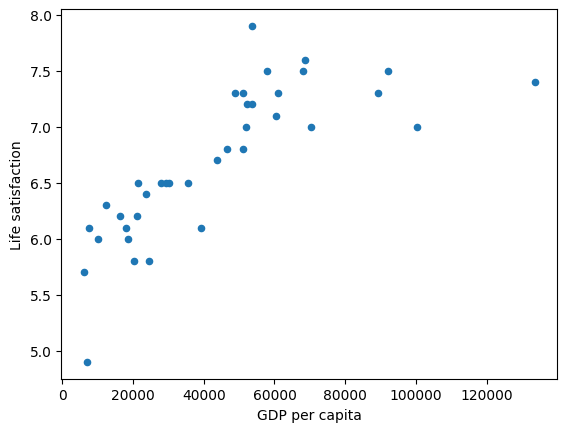

In [67]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [68]:
model = sklearn.linear_model.LinearRegression()

In [69]:
model.fit(X,y)

LinearRegression()

In [70]:
X_new = [[6104.1367093039]]
print(model.predict(X_new))

[[6.01505208]]


In [75]:
X_new = np.c_[gdp_per_capita["GDP per capita"]]


In [76]:
print(model.predict(X_new))

[[ 6.42976972]
 [ 5.93355041]
 [ 5.91269525]
 [ 5.9374712 ]
 [ 5.9409781 ]
 [ 6.02198966]
 [ 6.65812045]
 [ 6.0179472 ]
 [ 6.6969943 ]
 [ 6.09593238]
 [ 5.99474942]
 [ 6.18707814]
 [ 6.18775783]
 [ 6.98481563]
 [ 6.86336261]
 [ 6.00227146]
 [ 5.91006687]
 [ 6.820697  ]
 [ 5.92965663]
 [ 5.92205261]
 [ 5.94997975]
 [ 6.12422589]
 [ 6.38017179]
 [ 6.39650889]
 [ 6.03359775]
 [ 6.03643441]
 [ 6.01726738]
 [ 7.94223376]
 [ 5.96581449]
 [ 6.04009123]
 [ 6.21352944]
 [ 6.46737198]
 [ 5.96440762]
 [ 6.02756402]
 [ 5.91434397]
 [ 6.83391995]
 [ 6.24075551]
 [ 7.54784756]
 [ 6.19639021]
 [ 6.13020156]
 [ 5.95160586]
 [ 5.93586326]
 [ 5.91641545]
 [ 5.9469897 ]
 [ 6.01505208]
 [ 5.93426668]
 [ 5.96488712]
 [ 6.12870443]
 [ 6.08571649]
 [ 6.22231234]
 [ 7.45106871]
 [ 6.46920553]
 [ 6.38478113]
 [ 6.81992139]
 [ 5.9623387 ]
 [ 6.04269702]
 [ 7.11981854]
 [ 6.05739509]
 [ 5.97197925]
 [ 6.08050453]
 [ 5.97219457]
 [ 6.13886514]
 [ 6.06243115]
 [ 6.39069237]
 [ 6.01257134]
 [ 5.97212572]
 [ 6.66370

In [77]:
qol_predictions = model.predict(X_new)

In [78]:
print(qol_predictions)

[[ 6.42976972]
 [ 5.93355041]
 [ 5.91269525]
 [ 5.9374712 ]
 [ 5.9409781 ]
 [ 6.02198966]
 [ 6.65812045]
 [ 6.0179472 ]
 [ 6.6969943 ]
 [ 6.09593238]
 [ 5.99474942]
 [ 6.18707814]
 [ 6.18775783]
 [ 6.98481563]
 [ 6.86336261]
 [ 6.00227146]
 [ 5.91006687]
 [ 6.820697  ]
 [ 5.92965663]
 [ 5.92205261]
 [ 5.94997975]
 [ 6.12422589]
 [ 6.38017179]
 [ 6.39650889]
 [ 6.03359775]
 [ 6.03643441]
 [ 6.01726738]
 [ 7.94223376]
 [ 5.96581449]
 [ 6.04009123]
 [ 6.21352944]
 [ 6.46737198]
 [ 5.96440762]
 [ 6.02756402]
 [ 5.91434397]
 [ 6.83391995]
 [ 6.24075551]
 [ 7.54784756]
 [ 6.19639021]
 [ 6.13020156]
 [ 5.95160586]
 [ 5.93586326]
 [ 5.91641545]
 [ 5.9469897 ]
 [ 6.01505208]
 [ 5.93426668]
 [ 5.96488712]
 [ 6.12870443]
 [ 6.08571649]
 [ 6.22231234]
 [ 7.45106871]
 [ 6.46920553]
 [ 6.38478113]
 [ 6.81992139]
 [ 5.9623387 ]
 [ 6.04269702]
 [ 7.11981854]
 [ 6.05739509]
 [ 5.97197925]
 [ 6.08050453]
 [ 5.97219457]
 [ 6.13886514]
 [ 6.06243115]
 [ 6.39069237]
 [ 6.01257134]
 [ 5.97212572]
 [ 6.66370

In [99]:
gdp_per_capita['Quality of Life Predictions (lin-reg)'] = qol_predictions
gdp_per_capita.head(10)

,Country Code,GDP per capita,Quality of Life Predictions (lin-reg
Country Name,,,
Aruba,ABW,29342.100858,6.429770
Africa Eastern and Southern,AFE,1537.336021,5.933550
Afghanistan,AFG,368.754614,5.912695
Africa Western and Central,AFW,1757.030626,5.937471
Angola,AGO,1953.533757,5.940978
Albania,ALB,6492.872012,6.021990
Andorra,AND,42137.327271,6.658120
Arab World,ARB,6266.359916,6.017947
United Arab Emirates,ARE,44315.554183,6.696994


In [98]:
#gdp_per_capita.drop(['Quality of Life Predictions', 'Quality of Life Predictions (knn)', 'Quality of Life Predictions (lin-reg'], axis=1, inplace=True)

In [88]:
print(gdp_per_capita.loc['India'])
#life satisfaction seems a little high compared to even Colombia, which was gdp and qol 6104.136709 and 5.7, respectively.
#Try k nearest neighbors method instead.

Country Code                           IND
GDP per capita                 2256.590409
Quality of Life Predictions       5.946387
Name: India, dtype: object


In [101]:
#k-Nearest Neighbors approach
import sklearn.neighbors
model_knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
model_knn.fit(X,y)

KNeighborsRegressor(n_neighbors=3)

In [103]:
qol_knn_predictions = model_knn.predict(X_new)
gdp_per_capita['Quality of Life Predictions (knn)'] = qol_knn_predictions
gdp_per_capita.head(10)

,Country Code,GDP per capita,Quality of Life Predictions (lin-reg,Quality of Life Predictions (knn)
Country Name,,,,
Aruba,ABW,29342.100858,6.429770,6.500000
Africa Eastern and Southern,AFE,1537.336021,5.933550,5.566667
Afghanistan,AFG,368.754614,5.912695,5.566667
Africa Western and Central,AFW,1757.030626,5.937471,5.566667
Angola,AGO,1953.533757,5.940978,5.566667
Albania,ALB,6492.872012,6.021990,5.566667
Andorra,AND,42137.327271,6.658120,6.533333
Arab World,ARB,6266.359916,6.017947,5.566667
United Arab Emirates,ARE,44315.554183,6.696994,6.933333


In [107]:
print(gdp_per_capita.loc['Colombia'])
#The KNN predictions are much closer to the actual than linear regression.

Country Code                                    COL
GDP per capita                          6104.136709
Quality of Life Predictions (lin-reg       6.015052
Quality of Life Predictions (knn)          5.566667
Name: Colombia, dtype: object


In [108]:
print(gdp_per_capita.loc['India'])
#The KNN predictions are much more believable than those from linear regression.

Country Code                                    IND
GDP per capita                          2256.590409
Quality of Life Predictions (lin-reg       5.946387
Quality of Life Predictions (knn)          5.566667
Name: India, dtype: object


In [ ]:
#next, predict values for all missing countries and update the respective rows with predictions.